**Autism Detection using VGG16**

**Overview**

This repository contains code for detecting autism using a deep learning model based on the VGG16 architecture. Autism spectrum disorder (ASD) is a developmental disorder characterized by difficulties with social interaction and communication, and by restricted and repetitive behavior. The model is trained to classify images into two categories: ASD (autism spectrum disorder) and non-ASD.

**Workflow**

1) Mounting Google Drive: This block mounts Google Drive to access the dataset stored there.

2) Fetching Directories: Fetches directories for the train, test, and validation datasets.

3) Fetching Data: Loads data from the train, test, and validation directories.

4) Data Inspection: Displays sample images from the dataset to ensure successful access.

5) Data Augmentation: Augments the dataset to increase its size, rescales images, and sets batch size to 10. Shuffle is set to false for consistency in training. Class mode is set to binary for binary classification.

6) Importing Pre-trained Model: Imports the VGG16 pre-trained model.

7) Freezing Layers: Freezes the weights of the pre-trained VGG16 layers.

8) Modifying Last Layer: Modifies the last layer of the VGG16 model for binary classification.

9) Model Summary: Displays a summary of the modified VGG16 model architecture.

10) Training with Callbacks: Trains the model using callbacks for early stopping and saving the best model based on improved accuracy.

11) Saving Model: Saves the trained model.

12) Prediction: Uses the trained model to predict whether an image contains ASD or non-ASD.

13) Training without Early Stopping: Trains the model without early stopping.

14) Saving Model: Saves the trained model without early stopping.

15) Plotting Model Loss: Plots the loss curve during model training.

16) Plotting Model Accuracy: Plots the accuracy curve during model training.

17) Calculating Precision, Recall, and F1 Score: Computes precision, recall, and F1 score metrics for model evaluation.

18) Confusion Matrix (Test Set): Generates a confusion matrix for the test dataset.

19) Misclassification Analysis (Test Images): Analyzes misclassified images from the test dataset.

20) Confusion Matrix (Train Set): Generates a confusion matrix for the train dataset.

21) Misclassification Analysis (Train Images): Analyzes misclassified images from the train dataset.

22) Confusion Matrix (Validation Set): Generates a confusion matrix for the validation dataset.

23) Misclassification Analysis (Validation Images): Analyzes misclassified images from the validation dataset.

**Dependencies**

1) TensorFlow
2) Keras
3) NumPy
4) Matplotlib

**Usage**

1) Clone the repository.
2) Set up your environment with the required dependencies.
3) Follow the provided Jupyter Notebook or Python scripts for step-by-step execution.

**Dataset**

The dataset used in this project is stored in Google Drive. It contains images of individuals with and without autism spectrum disorder(Dataset source -> Kaggle).


**Author: Love Kumar Yadav**

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Fetching directories in variables train_dsr,validation_dir,test_dir**

In [ ]:
import os
base_dir = '/content/gdrive/MyDrive/ASD_v4'
train_dir = os.path.join(base_dir, '/content/gdrive/MyDrive/ASD_v4/train')
validation_dir = os.path.join(base_dir, '/content/gdrive/MyDrive/ASD_v4/valid')
test_dir = os.path.join(base_dir, '/content/gdrive/MyDrive/ASD_v4/test')

# Directory with our training ASD pictures
train_asd_dir = os.path.join(train_dir, '/content/gdrive/MyDrive/ASD_v4/train/Autistic')

# Directory with our training NASD pictures
train_nasd_dir = os.path.join(train_dir, '/content/gdrive/MyDrive/ASD_v4/train/Non_Autistic')

# Directory with our validation ASD pictures
validation_asd_dir = os.path.join(validation_dir, '/content/gdrive/MyDrive/ASD_v4/valid/Autistic')

# Directory with our validation NASD pictures
validation_nasd_dir = os.path.join(validation_dir, '/content/gdrive/MyDrive/ASD_v4/valid/Non_Autistic')

# Directory with our TEST ASD pictures
test_asd_dir = os.path.join(test_dir, '/content/gdrive/MyDrive/ASD_v4/test/Autistic')

# Directory with our TEST NASD pictures
test_nasd_dir = os.path.join(test_dir, '/content/gdrive/MyDrive/ASD_v4/test/Non_Autistic')


**Showing some fetched data**

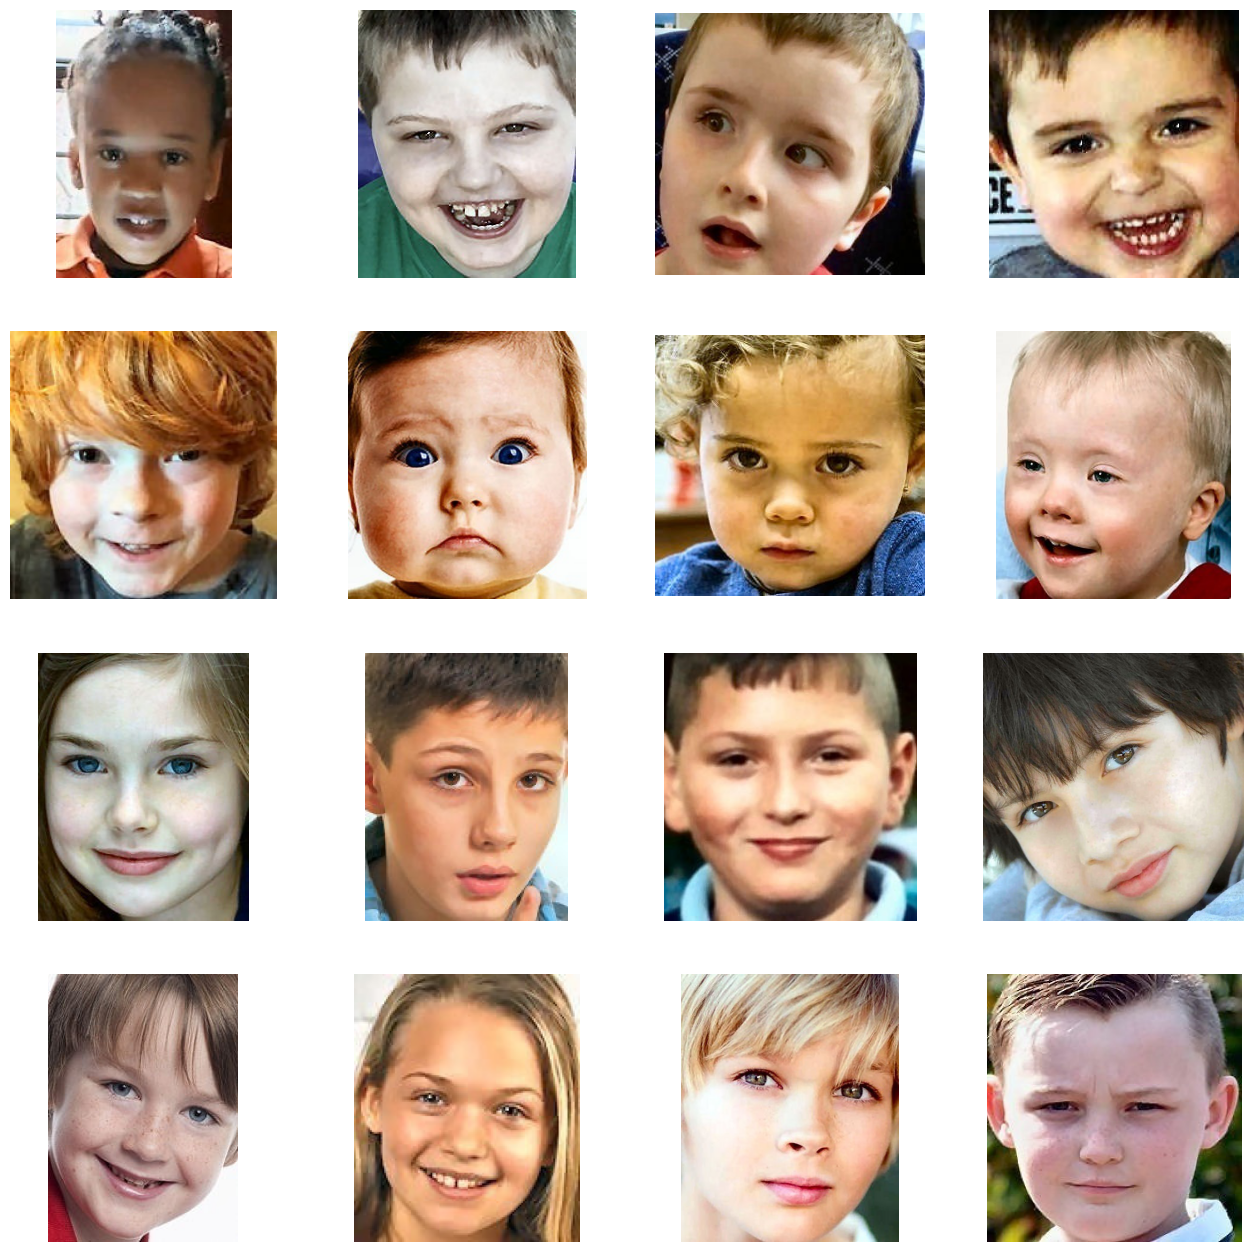

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Data Augmentation to make more photos**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/valid',
                                           target_size=(224,224),
                                           batch_size = 10,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/test',
                                            target_size=(224,224),
                                            batch_size = 10,
                                            class_mode='binary',
                                            shuffle=False)

Found 2526 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


**Pretrained VGG 19 Model Importing**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

80134624/80134624 [==============================] - 3s 0us/step


**Basic VGG19 Weight Not updated**

In [ ]:
#To set the layers to non-trainable (weights will not be updated)
for layer in base_model.layers:
    layer.trainable = False

**Last layer changed as per below**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

from keras import optimizers

learning_rate=0.0001

model.compile(optimizer = optimizers.Adam(learning_rate=learning_rate), loss = 'binary_crossentropy',metrics = ['acc'])
#model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.

#Often, the first sign of no improvement may not be the best time to stop training.use patience argument. rule of thumb to make it 10% of number of epoch.

#An additional callback is required that will save the best model observed during training for later use. This is the ModelCheckpoint callback.

from keras.callbacks import ModelCheckpoint, EarlyStopping
asd_vgg19_best= model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100,verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models',save_best_only=True)])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.7207 - acc: 0.6476

100/100 [==============================] - 313s 3s/step - loss: 0.7207 - acc: 0.6476 - val_loss: 0.3410 - val_acc: 0.8875
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.5454 - acc: 0.7230

100/100 [==============================] - 156s 2s/step - loss: 0.5454 - acc: 0.7230 - val_loss: 0.3327 - val_acc: 0.8875
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.5042 - acc: 0.7430

100/100 [==============================] - 105s 1s/step - loss: 0.5042 - acc: 0.7430 - val_loss: 0.2903 - val_acc: 0.9000
Epoch 4/100
100/100 [==============================] - 68s 684ms/step - loss: 0.4678 - acc: 0.7680 - val_loss: 0.2926 - val_acc: 0.9000
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 0.4633 - acc: 0.7821

100/100 [==============================] - 56s 562ms/step - loss: 0.4633 - acc: 0.7821 - val_loss: 0.2589 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 35s 353ms/step - loss: 0.4729 - acc: 0.7721 - val_loss: 0.3143 - val_acc: 0.8750
Epoch 7/100
100/100 [==============================] - 31s 307ms/step - loss: 0.4306 - acc: 0.7980 - val_loss: 0.2731 - val_acc: 0.9125
Epoch 8/100
100/100 [==============================] - 25s 246ms/step - loss: 0.4566 - acc: 0.7860 - val_loss: 0.3289 - val_acc: 0.8750
Epoch 9/100
100/100 [==============================] - ETA: 0s - loss: 0.4188 - acc: 0.8022

100/100 [==============================] - 27s 276ms/step - loss: 0.4188 - acc: 0.8022 - val_loss: 0.2250 - val_acc: 0.9125
Epoch 10/100
100/100 [==============================] - 23s 226ms/step - loss: 0.4571 - acc: 0.7751 - val_loss: 0.2364 - val_acc: 0.9500
Epoch 11/100
100/100 [==============================] - 21s 203ms/step - loss: 0.4402 - acc: 0.7912 - val_loss: 0.2303 - val_acc: 0.9500
Epoch 12/100
100/100 [==============================] - 19s 187ms/step - loss: 0.3878 - acc: 0.8170 - val_loss: 0.2754 - val_acc: 0.8875
Epoch 13/100
100/100 [==============================] - 26s 258ms/step - loss: 0.4179 - acc: 0.8070 - val_loss: 0.2826 - val_acc: 0.9000
Epoch 14/100
100/100 [==============================] - ETA: 0s - loss: 0.3967 - acc: 0.8062

100/100 [==============================] - 24s 241ms/step - loss: 0.3967 - acc: 0.8062 - val_loss: 0.2077 - val_acc: 0.9250
Epoch 15/100
100/100 [==============================] - 19s 189ms/step - loss: 0.4131 - acc: 0.8153 - val_loss: 0.2203 - val_acc: 0.9375
Epoch 16/100
100/100 [==============================] - ETA: 0s - loss: 0.4034 - acc: 0.8050

100/100 [==============================] - 24s 236ms/step - loss: 0.4034 - acc: 0.8050 - val_loss: 0.1886 - val_acc: 0.9500
Epoch 17/100
100/100 [==============================] - 20s 196ms/step - loss: 0.3937 - acc: 0.8050 - val_loss: 0.2236 - val_acc: 0.9250
Epoch 18/100
100/100 [==============================] - 21s 205ms/step - loss: 0.3810 - acc: 0.8410 - val_loss: 0.2002 - val_acc: 0.9375
Epoch 19/100
100/100 [==============================] - 18s 185ms/step - loss: 0.3720 - acc: 0.8213 - val_loss: 0.2052 - val_acc: 0.9375
Epoch 20/100
100/100 [==============================] - 19s 191ms/step - loss: 0.3564 - acc: 0.8450 - val_loss: 0.1903 - val_acc: 0.9500
Epoch 21/100
100/100 [==============================] - 20s 203ms/step - loss: 0.3582 - acc: 0.8320 - val_loss: 0.2006 - val_acc: 0.9375
Epoch 22/100
100/100 [==============================] - ETA: 0s - loss: 0.3489 - acc: 0.8370

100/100 [==============================] - 22s 217ms/step - loss: 0.3489 - acc: 0.8370 - val_loss: 0.1785 - val_acc: 0.9500
Epoch 23/100
100/100 [==============================] - ETA: 0s - loss: 0.3948 - acc: 0.8200

100/100 [==============================] - 24s 240ms/step - loss: 0.3948 - acc: 0.8200 - val_loss: 0.1775 - val_acc: 0.9750
Epoch 24/100
100/100 [==============================] - 20s 198ms/step - loss: 0.3485 - acc: 0.8474 - val_loss: 0.1837 - val_acc: 0.9375
Epoch 25/100
100/100 [==============================] - 18s 181ms/step - loss: 0.3545 - acc: 0.8340 - val_loss: 0.1850 - val_acc: 0.9500
Epoch 26/100
100/100 [==============================] - 20s 197ms/step - loss: 0.3572 - acc: 0.8470 - val_loss: 0.1845 - val_acc: 0.9375
Epoch 27/100
100/100 [==============================] - 18s 183ms/step - loss: 0.3189 - acc: 0.8710 - val_loss: 0.1799 - val_acc: 0.9500
Epoch 28/100
100/100 [==============================] - 18s 181ms/step - loss: 0.3447 - acc: 0.8444 - val_loss: 0.1794 - val_acc: 0.9250
Epoch 29/100
100/100 [==============================] - 20s 196ms/step - loss: 0.3367 - acc: 0.8550 - val_loss: 0.2057 - val_acc: 0.9375
Epoch 30/100
100/100 [==============================] 

100/100 [==============================] - 22s 220ms/step - loss: 0.3204 - acc: 0.8735 - val_loss: 0.1663 - val_acc: 0.9125
Epoch 31/100
100/100 [==============================] - 20s 201ms/step - loss: 0.3409 - acc: 0.8604 - val_loss: 0.1895 - val_acc: 0.9500
Epoch 32/100
100/100 [==============================] - ETA: 0s - loss: 0.2963 - acc: 0.8780

100/100 [==============================] - 22s 217ms/step - loss: 0.2963 - acc: 0.8780 - val_loss: 0.1644 - val_acc: 0.9625
Epoch 33/100
100/100 [==============================] - 19s 185ms/step - loss: 0.3242 - acc: 0.8580 - val_loss: 0.1725 - val_acc: 0.9500
Epoch 34/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2961 - acc: 0.8720 - val_loss: 0.1664 - val_acc: 0.9375
Epoch 35/100
100/100 [==============================] - 18s 183ms/step - loss: 0.2828 - acc: 0.8740 - val_loss: 0.1824 - val_acc: 0.9375
Epoch 36/100
100/100 [==============================] - 18s 180ms/step - loss: 0.3235 - acc: 0.8544 - val_loss: 0.2354 - val_acc: 0.9250
Epoch 37/100
100/100 [==============================] - 20s 200ms/step - loss: 0.2992 - acc: 0.8570 - val_loss: 0.2117 - val_acc: 0.9500
Epoch 38/100
100/100 [==============================] - 19s 185ms/step - loss: 0.3213 - acc: 0.8530 - val_loss: 0.1740 - val_acc: 0.9500
Epoch 39/100
100/100 [==============================] 

100/100 [==============================] - 23s 230ms/step - loss: 0.2752 - acc: 0.8930 - val_loss: 0.1534 - val_acc: 0.9500
Epoch 42/100
100/100 [==============================] - 19s 191ms/step - loss: 0.2664 - acc: 0.9000 - val_loss: 0.1579 - val_acc: 0.9500
Epoch 43/100
100/100 [==============================] - 19s 188ms/step - loss: 0.2836 - acc: 0.8890 - val_loss: 0.1587 - val_acc: 0.9500
Epoch 44/100
100/100 [==============================] - ETA: 0s - loss: 0.2621 - acc: 0.8946

100/100 [==============================] - 23s 226ms/step - loss: 0.2621 - acc: 0.8946 - val_loss: 0.1438 - val_acc: 0.9500
Epoch 45/100
100/100 [==============================] - 20s 200ms/step - loss: 0.2707 - acc: 0.8876 - val_loss: 0.1844 - val_acc: 0.9125
Epoch 46/100
100/100 [==============================] - 19s 190ms/step - loss: 0.2714 - acc: 0.8770 - val_loss: 0.1747 - val_acc: 0.9250
Epoch 47/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2611 - acc: 0.8845 - val_loss: 0.1674 - val_acc: 0.9500
Epoch 48/100
100/100 [==============================] - 19s 189ms/step - loss: 0.2793 - acc: 0.8910 - val_loss: 0.1919 - val_acc: 0.9250
Epoch 49/100
100/100 [==============================] - 19s 192ms/step - loss: 0.2788 - acc: 0.8880 - val_loss: 0.1685 - val_acc: 0.9500
Epoch 50/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2343 - acc: 0.9006 - val_loss: 0.1623 - val_acc: 0.9250
Epoch 51/100
100/100 [==============================] 

In [ ]:
model.save('/content/gdrive/MyDrive/Models/VGG19_best.h5')

In [ ]:
asd_vgg19 = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100)

Epoch 1/100
100/100 [==============================] - 20s 203ms/step - loss: 0.2486 - acc: 0.8930 - val_loss: 0.1423 - val_acc: 0.9500
Epoch 2/100
100/100 [==============================] - 18s 182ms/step - loss: 0.2445 - acc: 0.9040 - val_loss: 0.1467 - val_acc: 0.9500
Epoch 3/100
100/100 [==============================] - 19s 193ms/step - loss: 0.2640 - acc: 0.8860 - val_loss: 0.1563 - val_acc: 0.9375
Epoch 4/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2535 - acc: 0.8886 - val_loss: 0.1479 - val_acc: 0.9625
Epoch 5/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2409 - acc: 0.9050 - val_loss: 0.1647 - val_acc: 0.9375
Epoch 6/100
100/100 [==============================] - 19s 194ms/step - loss: 0.2519 - acc: 0.8980 - val_loss: 0.1526 - val_acc: 0.9375
Epoch 7/100
100/100 [==============================] - 18s 183ms/step - loss: 0.2164 - acc: 0.9070 - val_loss: 0.1376 - val_acc: 0.9500
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('/content/gdrive/MyDrive/Models/VGG19_100.h5')

**Model Loss Plotting**

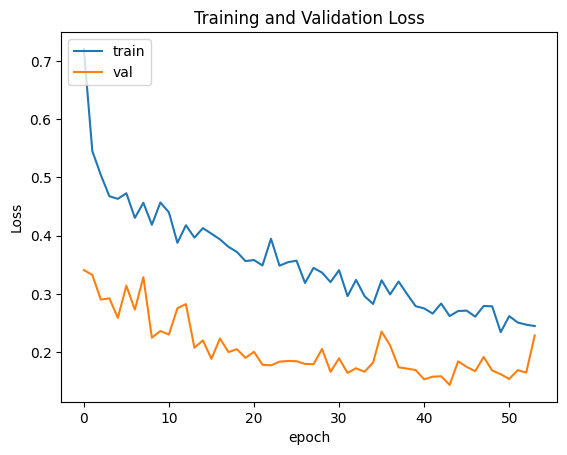

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(asd_vgg19_best.history['loss'])
plt.plot(asd_vgg19_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model Accuracy Plotting**

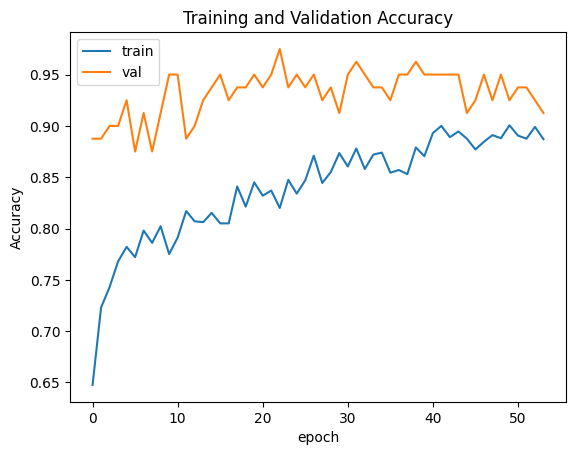

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(asd_vgg19_best.history['acc'])
plt.plot(asd_vgg19_best.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Prediction of an Image of Test Set**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Models/VGG19_100.h5')

1/1 [==============================] - 0s 161ms/step


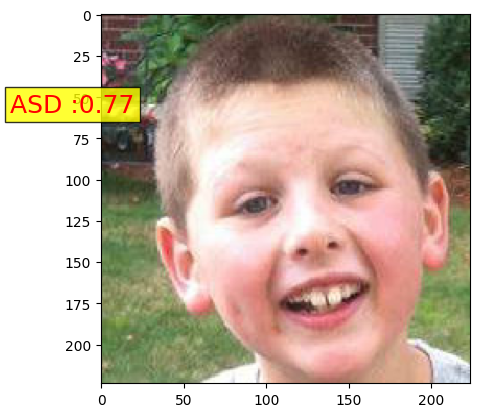

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/gdrive/MyDrive/ASD_v4/test/Autistic/ta.001.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the predicted probabilities to binary predictions
y_pred_binary = (ytesthat > 0.5).astype(int)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_binary)

# Calculate precision
precision = precision_score(y_true, y_pred_binary)

# Calculate recall
recall = recall_score(y_true, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_binary)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)






<ipython-input-24-0c598f35ada5>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


Test Accuracy: 0.9535714285714286
Precision: 0.9774436090225563
Recall: 0.9285714285714286
F1 Score: 0.9523809523809524


**Confusion Matrix of Test Set**

In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

<ipython-input-25-83125e26fe9f>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 13


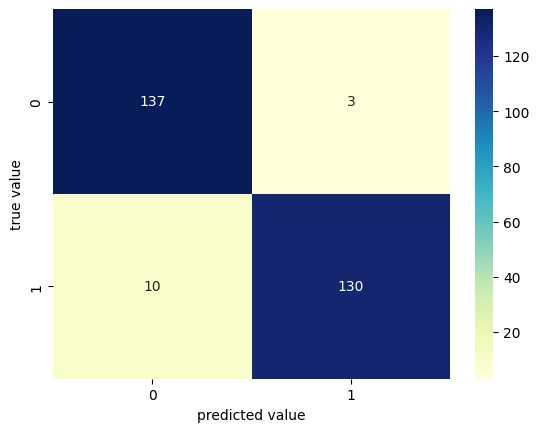

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Confusion Matrix of Train Set**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD_v4/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                              shuffle=False,
                                             class_mode='binary')

Found 2526 images belonging to 2 classes.
Found 2526 images belonging to 2 classes.


In [ ]:
import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

<ipython-input-31-86d4ed593533>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

Total misclassified image from 2526 Training images : 23


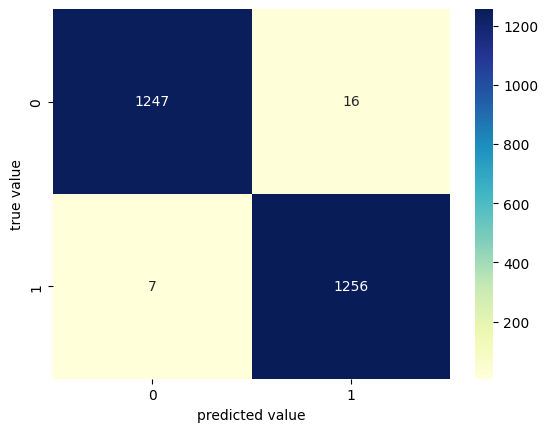

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Confusion Matrix of Validation Set**

In [ ]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

<ipython-input-41-853db96b44e2>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 4


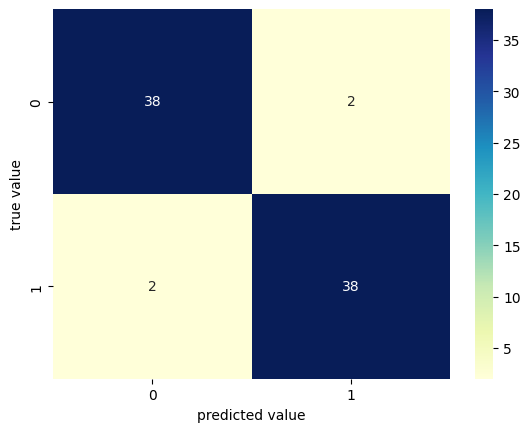

In [ ]:
#Prediction of valid set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');